# Investment assignment
### Business objective
The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing’.
### Conditions
1)It wants to invest between 5 to 15 million USD per round of investment

2) It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

In [1]:
NORM.DIST(30, 35, 5, TRUE)

NameError: name 'NORM' is not defined

In [1]:
#Import required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import chardet
import matplotlib.pyplot as plt

In [2]:
#read the companies dataset and check first five rows
companies=pd.read_csv("companies.csv",encoding='ISO-8859-1')
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010


In [3]:
#read round2 dataset and check first 5 rows of it
rounds2=pd.read_csv("rounds2.csv",encoding='ISO-8859-1')
rounds2.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Data understanding (Data exploration) 

In [4]:
companies.sample(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
11450,/Organization/Classical-Diary,Classical Diary,http://www.classicaldiary.com/,Music,operating,GBR,H9,London,London,8/7/2013
60616,/Organization/Unoceros,Unoceros,http://unoceros.com,Application Platforms|Mobile Commerce|Software,operating,USA,WA,Seattle,Kirkland,NaN
41697,/Organization/Outboundengine,OutboundEngine,http://www.outboundengine.com,Advertising|Email Marketing|Marketing Automati...,operating,USA,TX,Austin,Austin,1/9/2012
56152,/Organization/Tagwallet,tagWALLET,http://www.tagwallet.mobi,Consulting,operating,NaN,NaN,NaN,NaN,1/1/2014
29135,/Organization/Itarget-Com,itarget.com,http://www.itarget.com/,NaN,closed,NaN,NaN,NaN,NaN,NaN
37256,/Organization/Moxsie,Moxsie,http://www.moxsie.com,E-Commerce|Fashion|Shopping,closed,USA,CA,SF Bay Area,Palo Alto,NaN
4226,/Organization/Aria-Systems,Aria Systems,http://www.ariasystems.com,Billing|Cloud Computing|Enterprise Software|Mo...,operating,USA,CA,SF Bay Area,San Francisco,1/1/2003
42983,/Organization/Perfect-Memory,Perfect Memory,http://perfect-memory.com,Education,operating,FRA,98,FRA - Other,ChamaliÃ¨res-sur-loire,1/1/2008
14978,/Organization/Dealhamster,DealHamster,http://www.dealhamster.com,E-Commerce,operating,NaN,NaN,NaN,NaN,4/3/2009
56442,/Organization/Tapsense,TapSense,http://tapsense.com,Advertising|Android|iOS|iPad|Mobile,operating,USA,CA,SF Bay Area,San Francisco,10/5/2011


In [5]:
#shape of companies dataset
companies.shape

(66368, 10)

In [6]:
rounds2.sample(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
45197,/ORGANIZATION/HUMAGADE,/funding-round/70c10c0450bed80f8ff5c01bf4fe4f51,venture,NaN,10/10/2006,10600000.0
46356,/organization/iifl,/funding-round/12a5d91b65d9e8bf3de99f2a149182f0,undisclosed,NaN,24-10-2015,173000000.0
55830,/organization/lighthouse-bcs,/funding-round/312d97fa90be61d3bc5917f08c5e4c16,undisclosed,NaN,23-06-2011,NaN
105465,/ORGANIZATION/UVORE,/funding-round/b63a6008c9be29b29e588ff37045fef0,seed,NaN,1/8/2014,NaN
12768,/organization/bitpass,/funding-round/60ea958648f59dc6ef72a99d87b03aec,venture,A,1/7/2003,1500000.0
40786,/organization/gohealth,/funding-round/e23d87b9567027173af62d3679a9d677,venture,NaN,6/10/2015,25375733.0
104589,/ORGANIZATION/UNI-CONTROL,/funding-round/479dba0e9ae561c37ecd1b0617200724,equity_crowdfunding,NaN,12/9/2014,NaN
55548,/organization/libboo,/funding-round/7f671731c088fdb2588bb670c9b969b4,seed,NaN,3/10/2012,1100000.0
79143,/ORGANIZATION/PROVEN-COM,/funding-round/b5e58b5951dc366cb7f7892e53a0f0bd,venture,NaN,10/7/2015,241453.0
60164,/organization/mediant-communications,/funding-round/09e78d621627e32263f79dd32752ccd3,venture,NaN,7/1/2014,7000000.0


In [7]:
#shape of rounds2 dataset
rounds2.shape

(114949, 6)

## Data Inspection 

In [8]:
#fetch information of companies dataset
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [9]:
#describing companies dataset
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Muecs,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,1/1/2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [10]:
#fetch information of rounds2 dataset
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [11]:
#describing rounds2 dataset
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


# Checkpoint 1 : Data Cleaning 1

In [12]:
#it has been observed that there are some data in company_permalink(companies dataset) and permalink(rounds2 dataset) which is repetative in upper case. So therefore, using lower() function
#data can be converted to make it unique
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower().tolist()
companies['permalink'] = companies['permalink'].str.lower().tolist()

In [13]:
#now here we can observe that after converting data into lower case, difference in data is 7
difference=set(rounds2['company_permalink'])-set(companies['permalink'])
print("Difference is data of companies and rounds2 data after coverting into lower case: ",len(difference))
print("\nData are: ",difference)

Difference is data of companies and rounds2 data after coverting into lower case:  7

Data are:  {'/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80', '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f', '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦', '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80', '/organization/e-cã\x8abica', '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80', '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80'}


#### Above, we can observe that data has some encoding issues, we need to encode and then decode it

In [14]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('ISO-8859-1').str.decode('ascii','ignore')
companies['permalink'] = companies['permalink'].str.encode('ISO-8859-1').str.decode('ascii','ignore')

#### 1) How many unique companies are present in rounds2?

In [15]:
print("Unique companies in rounds2 are: ",rounds2['company_permalink'].nunique())

Unique companies in rounds2 are:  66368


#### 2) How many unique companies are present in companies?

In [16]:
print("Unique companies in companies are: ",companies['permalink'].nunique())

Unique companies in companies are:  66368


#### 4) Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [17]:
final_difference = (rounds2['company_permalink'].nunique())-(companies['permalink'].nunique())
print("Difference in companies and companies in round 2 are: ",final_difference)

Difference in companies and companies in round 2 are:  0


#### 5) Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [18]:
#merging companies and rounds2 dataset
master_frame=pd.merge(companies,rounds2,left_on=companies['permalink'],right_on=rounds2['company_permalink'],how='inner')
master_frame.shape

(114949, 17)

In [19]:
#check master_frame
master_frame.head(5)

,key_0,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/organization/-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/organization/-the-one-of-them-inc-,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [20]:
#getting information of merged dataset
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   key_0                    114949 non-null  object 
 1   permalink                114949 non-null  object 
 2   name                     114948 non-null  object 
 3   homepage_url             108815 non-null  object 
 4   category_list            111539 non-null  object 
 5   status                   114949 non-null  object 
 6   country_code             106271 non-null  object 
 7   state_code               104003 non-null  object 
 8   region                   104782 non-null  object 
 9   city                     104785 non-null  object 
 10  founded_at               94428 non-null   object 
 11  company_permalink        114949 non-null  object 
 12  funding_round_permalink  114949 non-null  object 
 13  funding_round_type       114949 non-null  object 
 14  fund

In [21]:
#checking null values in merged dataset (master_frame)
master_frame.isnull().sum()

key_0                          0
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

# Checkpoint 2: Funding Type Analysis

#### Removing redundant columns 

In [22]:
master_frame =  master_frame.drop(['key_0','state_code', 'region', 'city', 'founded_at','funding_round_permalink',
       'funding_round_code', 'funded_at','name','homepage_url','status'], axis=1)
master_frame.isnull().sum()

permalink                 0
category_list          3410
country_code           8678
company_permalink         0
funding_round_type        0
raised_amount_usd     19990
dtype: int64

In [23]:
#Determining missing values in percentage
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

permalink              0.00
category_list          2.97
country_code           7.55
company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
dtype: float64

In [24]:
#checking unique values of funding type
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

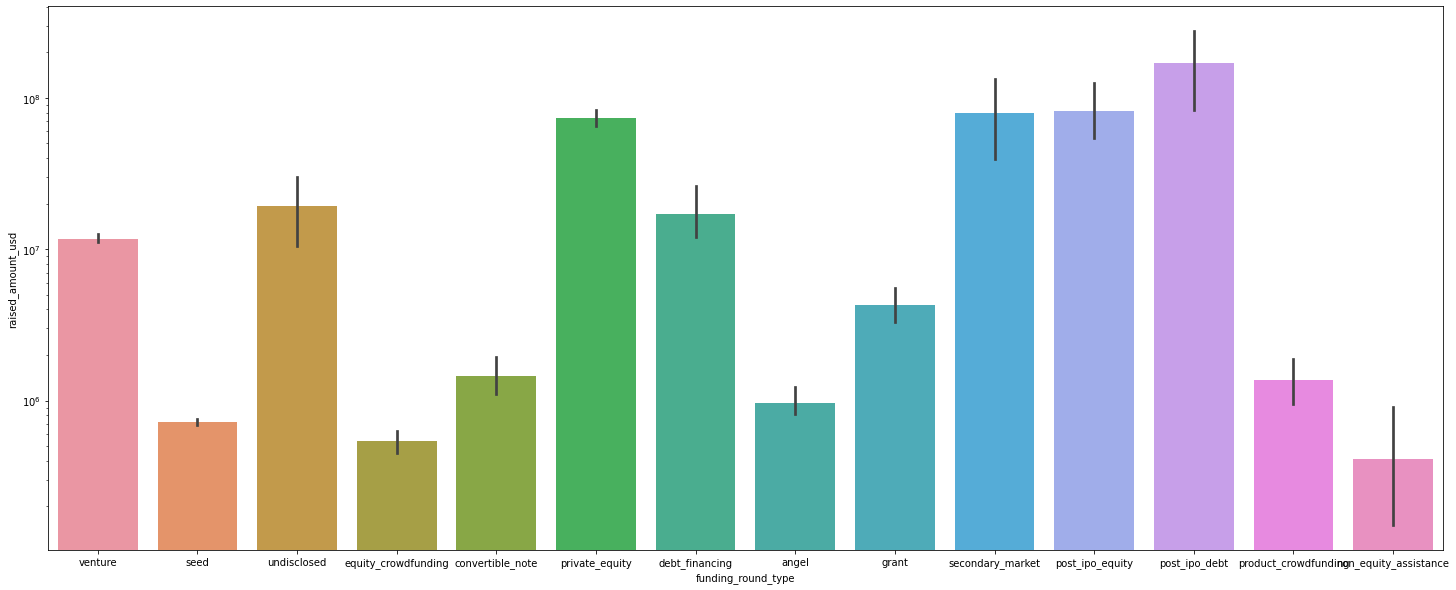

In [25]:
# boxplot of a variable across all 14 funding categories
plt.figure(figsize=(25,10))
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame)
plt.yscale('log')
plt.show()

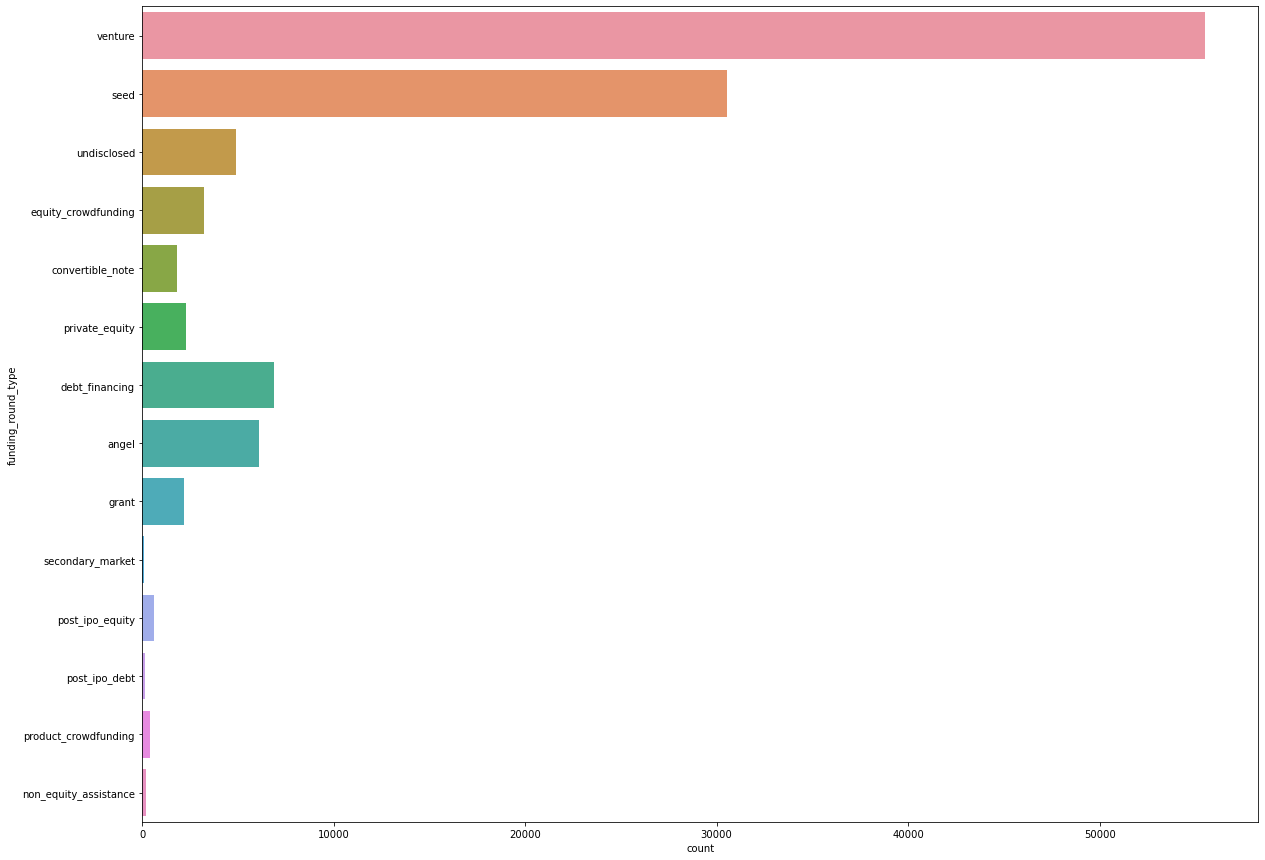

In [26]:
# Plotting count across a categorical variable(funding_round_type)
plt.figure(figsize=(20, 15))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

In [27]:
#keeping the four funding types (venture, angel, seed, and private equity) as the requirement
master_frame=master_frame[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])]
master_frame.sample(10)

,permalink,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
108971,/organization/wacai,Software,CHN,/organization/wacai,venture,15000000.0
80700,/organization/quixey,Technology,USA,/organization/quixey,venture,3800000.0
95168,/organization/storefront,Commercial Real Estate|Fashion|Marketplaces|Re...,USA,/organization/storefront,venture,7300000.0
59695,/organization/maxwest-environmental-systems,Clean Technology,USA,/organization/maxwest-environmental-systems,venture,32500000.0
108079,/organization/vitriflex,Clean Technology,NaN,/organization/vitriflex,venture,4900001.0
55967,/organization/lili---beauty,Retail,CHN,/organization/lili---beauty,venture,100000000.0
103608,/organization/turbine-analytics-s-a,Analytics|Big Data|Information Services|Risk M...,POL,/organization/turbine-analytics-s-a,seed,1000000.0
97492,/organization/takelessons-com,Education|Local|Marketplaces|Music|Services|So...,USA,/organization/takelessons-com,venture,4000000.0
15713,/organization/burstmedia,Advertising,USA,/organization/burstmedia,private_equity,15000000.0
74044,/organization/peek-com,Curated Web|E-Commerce|Internet|Marketplaces|M...,USA,/organization/peek-com,seed,1400000.0


In [28]:
#shape of merged dataset(master_frame)
master_frame.shape

(94397, 6)

In [29]:
#as there are 14% missing values in raised_amount_usd and it is one of the important column, so I dropped this column as Null values in this column would affect analysis
master_frame=master_frame.loc[~(master_frame.raised_amount_usd.isnull())]

In [30]:
#again checking missing values in percentage
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

permalink             0.00
category_list         1.06
country_code          6.23
company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
dtype: float64

In [31]:
#in category_list and country_code only 1% and 6% are null values, so Null values can be removed
master_frame=master_frame.loc[~(master_frame.category_list.isnull() | master_frame.country_code.isnull())]
master_frame.head()

,permalink,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,/organization/-fame,venture,10000000.0
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,/organization/-qounter,seed,700000.0
4,/organization/0-6-com,Curated Web,CHN,/organization/0-6-com,venture,2000000.0
7,/organization/0ndine-biomedical-inc,Biotechnology,CAN,/organization/0ndine-biomedical-inc,seed,43360.0
8,/organization/0ndine-biomedical-inc,Biotechnology,CAN,/organization/0ndine-biomedical-inc,venture,719491.0


In [32]:
#checking null values in percentage and we can observe all null values are removed
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

permalink             0.0
category_list         0.0
country_code          0.0
company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [33]:
#getting total number of counts in funding type
master_frame.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

C:\Users\sonas_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


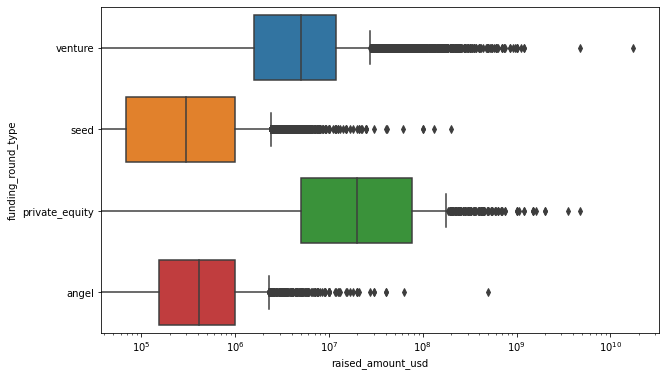

In [34]:
#visualising categorical variable(funding_round_type) using boxplot
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(master_frame['raised_amount_usd'],master_frame['funding_round_type'])
plt.xscale('log')
plt.show()


### Note: In above plot, we can observe outliers in raised_amount_usd for all funding types, so therefore *median* should be used for representing all funding type

#### 1)Representative funding amount of venture type

#### 2)Representative funding amount of angel type

#### 3)Representative funding amount of seed type

#### 4)Representative funding amount of private equity type

In [35]:
#calculate the median for different funding types i.e. seed, angel, venture and private equity in millions
master_frame.groupby(master_frame['funding_round_type'])['raised_amount_usd'].median().round(2)

funding_round_type
angel               414906.0
private_equity    20000000.0
seed                300000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

#### Check point 5 : Plot 1:  A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

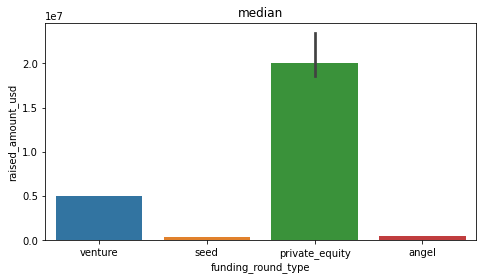

In [36]:
#plotting barplot
plt.figure(figsize=(17,4))
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=master_frame,estimator=np.median)
plt.title("median")
plt.show()

#### 5)Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
It can be observed from above that venture type investment is 5 million USD and falls between 5-15M USD, so therefore investment type <b>Venture</b> is most suitable for spark fund. 

In [37]:
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture')]

In [38]:
master_frame.shape

(47809, 6)

# Checkpoint 3: Country Analysis

- Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
- For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [39]:
#creating pivot table representing total investment amount for each country to extract top 9 countries for choosen investment type (Venture)
country=master_frame.pivot_table(index='country_code',values='raised_amount_usd',aggfunc=sum).sort_values(by='raised_amount_usd',ascending=False)
top9=country[0:9]
top9

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


In [40]:
top9=top9.reset_index()

#### Checkpoint 5: Plot 2 : A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.    

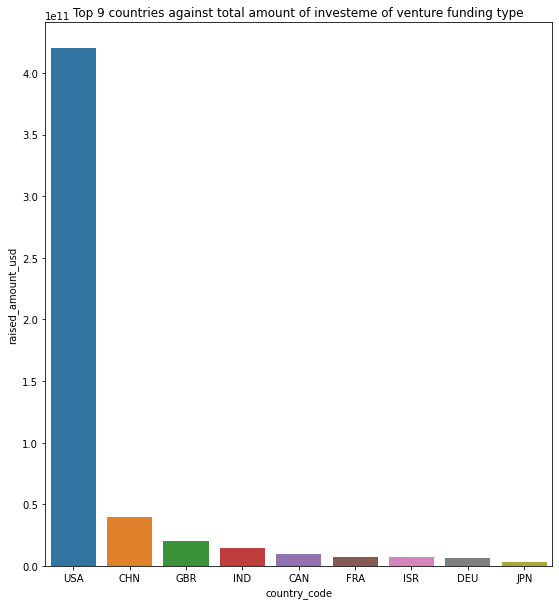

In [41]:
# plotting bar graph for top 9 countries against the total amount of investments of venture as funding type
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Top 9 countries against total amount of investeme of venture funding type")
sns.barplot(y='raised_amount_usd', x='country_code', data=top9)
plt.show()


In [42]:
#As per the link https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language, top 3 countries who has official language as english are USA, GBR, and IND
master_frame=master_frame[(master_frame['country_code']=='USA')|
                         (master_frame['country_code']=='GBR')|
                         (master_frame['country_code']=='IND')]
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
GBR    2.007281e+10
IND    1.426151e+10
Name: raised_amount_usd, dtype: float64

In [43]:
#check master_dataframe where country codes are only USA, GBR and IND
master_frame.sample(20)

,permalink,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd
23785,/organization/cortexica,Brand Marketing|Graphics|Search|Software|Syste...,GBR,/organization/cortexica,venture,3450000.0
72332,/organization/owncloud,Enterprise Software,USA,/organization/owncloud,venture,6300000.0
88481,/organization/sharethe,Soccer|Social Media|Social Network Media|Sports,GBR,/organization/sharethe,venture,1551791.0
42430,/organization/guidespark,Enterprise Software,USA,/organization/guidespark,venture,15000000.0
63420,/organization/mojave-networks,Cloud Security|Fraud Detection|Mobile,USA,/organization/mojave-networks,venture,5000000.0
27972,/organization/dipexium-pharmaceuticals,Biotechnology|Health Care,USA,/organization/dipexium-pharmaceuticals,venture,930000.0
36443,/organization/flite,Advertising|Brand Marketing|Mobile Advertising...,USA,/organization/flite,venture,2999993.0
112392,/organization/xradia,Biotechnology,USA,/organization/xradia,venture,4000000.0
67516,/organization/newvoicemedia,Enterprise Software,GBR,/organization/newvoicemedia,venture,6300000.0
101399,/organization/top10-media,News,USA,/organization/top10-media,venture,3500000.0


In [44]:
#shape pf master_frame
master_frame.shape

(38803, 6)

# Checkpoint 4: Sector Analysis 1
This is the third goal of analysis — sector analysis.

 

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

 

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

 

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

Extract the primary sector of each category list from the category_list column

Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [45]:
#extracting primary sector of each category_list column using split 
master_frame['category_list']=master_frame['category_list'].apply(lambda x:x.split('|')[0])
master_frame['category_list'].head(10)

0           Media
10      Analytics
11      Analytics
12      Analytics
22           Apps
28      Education
34    Curated Web
38    Curated Web
39    Curated Web
41    Curated Web
Name: category_list, dtype: object

In [46]:
#shape of master_frame
master_frame.shape

(38803, 6)

In [47]:
#read the mapping dataset and check first five rows and replacing some weird values like "AOlytics" so replacing it with "Analytics"
mapping=pd.read_csv('mapping.csv',encoding='ISO-8859-1')
mapping.category_list = mapping.category_list.replace({'0':'na','2.na':'2.0'},regex=True)
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [48]:
#getting info of mapping dataframe
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [49]:
#shape of mapping dataframe
mapping.shape

(688, 10)

In [50]:
#Reshaping the mapping dataframe so that we can merge it with master_frame dataframe. Using pd.melt() function to unpivot the table.
mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                            'Social, Finance, Analytics, Advertising']) 
mapping.head()

,category_list,variable,value
0,NaN,Manufacturing,0
1,3D,Manufacturing,1
2,3D Printing,Manufacturing,1
3,3D Technology,Manufacturing,1
4,Accounting,Manufacturing,0


In [51]:
#removing all rows who has value=0 and then dropping value column
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
#renaming "variable" to "main_sector" 
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [52]:
#merging master_frame with mapping dataframe
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,permalink,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,Media,IND,/organization/-fame,venture,10000000.0,Entertainment
1,/organization/0xdata,Analytics,USA,/organization/0xdata,venture,20000000.0,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,Analytics,USA,/organization/0xdata,venture,1700000.0,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,Analytics,USA,/organization/0xdata,venture,8900000.0,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,Apps,USA,/organization/1-mainstream,venture,5000000.0,"News, Search and Messaging"


In [53]:
#getting final shape of master_frame dataframe
master_frame.shape

(38803, 7)

In [54]:
#checking unique values of main_sector column
master_frame['main_sector'].unique()

array(['Entertainment', 'Social, Finance, Analytics, Advertising',
       'News, Search and Messaging', 'Others', 'Health',
       'Cleantech / Semiconductors', 'Manufacturing',
       'Automotive & Sports', nan], dtype=object)

In [55]:
#getting info of master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 38802
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           38803 non-null  object 
 1   category_list       38803 non-null  object 
 2   country_code        38803 non-null  object 
 3   company_permalink   38803 non-null  object 
 4   funding_round_type  38803 non-null  object 
 5   raised_amount_usd   38803 non-null  float64
 6   main_sector         38638 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


In [56]:
#checking how many null values are there main_sector as per category_list
master_frame.loc[(master_frame.main_sector.isnull())]['category_list'].value_counts()

Nanotechnology                     141
Navigation                           6
Enterprise 2.0                       4
Natural Language Processing          3
Retirement                           2
Adaptive Equipment                   2
Product Search                       1
Racing                               1
GreenTech                            1
Specialty Retail                     1
Rapidly Expanding                    1
Biotechnology and Semiconductor      1
Natural Gas Uses                     1
Name: category_list, dtype: int64

In [57]:
#getting total null values in dataframe
round(100*master_frame.isnull().sum()/len(master_frame.index),2)

permalink             0.00
category_list         0.00
country_code          0.00
company_permalink     0.00
funding_round_type    0.00
raised_amount_usd     0.00
main_sector           0.43
dtype: float64

In [58]:
#it can be observed that main_sector has just 0.43% null values in main sector and removing those rows will be relevant
master_frame=master_frame[~(master_frame.main_sector.isnull())]
print(master_frame.isnull().sum())
print(master_frame.info())

permalink             0
category_list         0
country_code          0
company_permalink     0
funding_round_type    0
raised_amount_usd     0
main_sector           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38638 entries, 0 to 38802
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           38638 non-null  object 
 1   category_list       38638 non-null  object 
 2   country_code        38638 non-null  object 
 3   company_permalink   38638 non-null  object 
 4   funding_round_type  38638 non-null  object 
 5   raised_amount_usd   38638 non-null  float64
 6   main_sector         38638 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ MB
None


# Checkpoint 5: Sector analysis
Now you have a data frame with each company’s main sector (main_sector) mapped to it. When we say sector analysis, we refer to one of the eight main sectors.

Also, you know the top three English speaking countries and the most suitable funding type for Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.

Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [59]:
#creating three different dataframe D1,D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range.
D1=master_frame[(master_frame['country_code']=='USA')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]
D2=master_frame[(master_frame['country_code']=='GBR')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]
D3=master_frame[(master_frame['country_code']=='IND')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]

#### 1)Total number of Investments (count)

In [60]:
print("Total number of investments in USA: ",D1.raised_amount_usd.count())
print("Total number of investments in GBR: ",D2.raised_amount_usd.count())
print("Total number of investments in IND: ",D3.raised_amount_usd.count())

Total number of investments in USA:  12012
Total number of investments in GBR:  619
Total number of investments in IND:  328


#### 2) Total amount of investment (USD) 

In [61]:
print("Total amount of investments in USA: ",D1.raised_amount_usd.sum())
print("Total amount of investments in GBR: ",D2.raised_amount_usd.sum())
print("Total amount of investments in IND: ",D3.raised_amount_usd.sum())

Total amount of investments in USA:  107318294664.0
Total amount of investments in GBR:  5365228300.0
Total amount of investments in IND:  2949543602.0


#### 3) Top Sector name (no. of investment-wise)
#### 4) Second Sector name (no. of investment-wise)
#### 5) Third Sector name (no. of investment-wise)

In [62]:
#getting main sector for D1 dataframe by sorting values in descending order to get top sector name
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2300
News, Search and Messaging                 1582
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [63]:
#getting main sector for D2 dataframe by sorting values in descending order to get top sector name
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 128
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [64]:
#getting main sector for D3 dataframe by sorting values in descending order to get top sector name
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

### For point 3 (top sector count-wise), which company received the highest investment?

In [65]:
#as we have observed, D1 dataframe has 'Others' as main sector. After that, pivot table is created for companies_permalink stating investment amount
topCompany_USA=D1[D1['main_sector']=='Others']
D1_company1=topCompany_USA.pivot_table(values="raised_amount_usd",index="company_permalink",aggfunc='sum').sort_values(by="raised_amount_usd",ascending=False)
D1_company1.head()

,raised_amount_usd
company_permalink,
/organization/virtustream,64300000.0
/organization/capella,54968051.0
/organization/airtight-networks,54201907.0
/organization/decarta,52100000.0
/organization/black-duck-software,51000000.0


In [66]:
#as we have observed, D2 dataframe has 'Others' as main sector. After that, pivot table is created for companies_permalink
topCompany_GBR=D2[D2['main_sector']=='Others']
D2_company1=topCompany_GBR.pivot_table(values="raised_amount_usd",index="company_permalink",aggfunc='sum').sort_values(by="raised_amount_usd",ascending=False)
D2_company1.head()

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37000000.0
/organization/sensage,36250000.0
/organization/enigmatic,32500000.0
/organization/silverrail-technologies,29000000.0
/organization/opencloud,27972766.0


In [67]:
#as we have observed, D1 dataframe has 'Others' as top main sector. After that, pivot table is created for companies_permalink
topCompany_IND=D3[D3['main_sector']=='Others']
D3_company1=topCompany_IND.pivot_table(values="raised_amount_usd",index="company_permalink",aggfunc='sum').sort_values(by="raised_amount_usd",ascending=False)
D3_company1.head()

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39000000.0
/organization/myntra,38000000.0
/organization/commonfloor,32900000.0
/organization/pepperfry-com,28000000.0
/organization/itzcash-card-ltd,25000000.0


### For point 4 (second best sector count-wise), which company received the highest investment?

In [68]:
#as we have observed, D1 dataframe has 'Social, Finance, Analytics, Advertising' as second main sector. After that, pivot table is created for companies_permalink
secondCompany_USA=D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
D1_company2=secondCompany_USA.pivot_table(values="raised_amount_usd",index="company_permalink",aggfunc='sum').sort_values(by="raised_amount_usd",ascending=False)
D1_company2.head()

,raised_amount_usd
company_permalink,
/organization/shotspotter,67933006.0
/organization/demandbase,63000000.0
/organization/intacct,61800000.0
/organization/netbase,60600000.0
/organization/lotame,59700000.0


In [69]:
#as we have observed, D2 dataframe has 'Social, Finance, Analytics, Advertising' as second main sector. After that, pivot table is created for companies_permalink
secondCompany_GBR=D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
D2_company2=secondCompany_GBR.pivot_table(values="raised_amount_usd",index="company_permalink",aggfunc='sum').sort_values(by="raised_amount_usd",ascending=False)
D2_company2.head()

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37500000.0
/organization/mythings,34000000.0
/organization/zopa,32900000.0
/organization/imagini,28550000.0
/organization/marketinvoice,25553007.0


In [70]:
#as we have observed, D3 dataframe has 'Social, Finance, Analytics, Advertising' as second main sector. After that, pivot table is created for companies_permalink
secondCompany_IND=D3[D3['main_sector']=='Social, Finance, Analytics, Advertising']
D3_company2=secondCompany_IND.pivot_table(values="raised_amount_usd",index="company_permalink",aggfunc='sum').sort_values(by="raised_amount_usd",ascending=False)
D3_company2.head()

,raised_amount_usd
company_permalink,
/organization/manthan-systems,50700000.0
/organization/komli-media,28000000.0
/organization/shopclues-com,25000000.0
/organization/intarvo,21900000.0
/organization/grameen-financial-services,21556050.0


# Checkpoint 6: Plots

### 3) A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.
### Note: Other plots are plotted above

In [71]:
#taking top3 sector of the top 3 countries for D1 dataframe
D1=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D1

,permalink,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,main_sector
3,/organization/0xdata,Analytics,USA,/organization/0xdata,venture,8900000.0,"Social, Finance, Analytics, Advertising"
17,/organization/128-technology,Service Providers,USA,/organization/128-technology,venture,11999347.0,Others
29,/organization/170-systems,Software,USA,/organization/170-systems,venture,14000000.0,Others
31,/organization/17zuoye,Education,USA,/organization/17zuoye,venture,5000000.0,Others
32,/organization/17zuoye,Education,USA,/organization/17zuoye,venture,10000000.0,Others
...,...,...,...,...,...,...,...
38791,/organization/zynga,Facebook Applications,USA,/organization/zynga,venture,15000000.0,"Social, Finance, Analytics, Advertising"
38794,/organization/zynga,Facebook Applications,USA,/organization/zynga,venture,5026000.0,"Social, Finance, Analytics, Advertising"
38798,/organization/zyomyx-inc,Biotechnology,USA,/organization/zyomyx-inc,venture,12000000.0,Cleantech / Semiconductors
38799,/organization/zyomyx-inc,Biotechnology,USA,/organization/zyomyx-inc,venture,14219999.0,Cleantech / Semiconductors


In [72]:
#taking top3 sector of the top 3 countries for D2 dataframe
D2=D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D2

,permalink,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,main_sector
108,/organization/365scores,Android,GBR,/organization/365scores,venture,5500000.0,"Social, Finance, Analytics, Advertising"
305,/organization/abcodia,Biotechnology,GBR,/organization/abcodia,venture,8259067.0,Cleantech / Semiconductors
381,/organization/acacia-pharma,Biotechnology,GBR,/organization/acacia-pharma,venture,10000000.0,Cleantech / Semiconductors
393,/organization/acal-energy,Clean Technology,GBR,/organization/acal-energy,venture,9910333.0,Cleantech / Semiconductors
396,/organization/acal-enterprise-solutions,Information Technology,GBR,/organization/acal-enterprise-solutions,venture,10720178.0,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...
38674,/organization/zoopla,Property Management,GBR,/organization/zoopla,venture,5440000.0,"Social, Finance, Analytics, Advertising"
38688,/organization/zopa,Finance,GBR,/organization/zopa,venture,12900000.0,"Social, Finance, Analytics, Advertising"
38689,/organization/zopa,Finance,GBR,/organization/zopa,venture,15000000.0,"Social, Finance, Analytics, Advertising"
38690,/organization/zopa,Finance,GBR,/organization/zopa,venture,5000000.0,"Social, Finance, Analytics, Advertising"


In [73]:
#taking top3 sector of the top 3 countries for D3 dataframe
D3=D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]
D3

,permalink,category_list,country_code,company_permalink,funding_round_type,raised_amount_usd,main_sector
55,/organization/21diamonds-india,E-Commerce,IND,/organization/21diamonds-india,venture,6369507.0,Others
276,/organization/a-little-world,Finance,IND,/organization/a-little-world,venture,6410000.0,"Social, Finance, Analytics, Advertising"
1262,/organization/agile,Finance,IND,/organization/agile,venture,5740000.0,"Social, Finance, Analytics, Advertising"
1522,/organization/akosha,Consumer Internet,IND,/organization/akosha,venture,5000000.0,"Social, Finance, Analytics, Advertising"
1915,/organization/amagi-media-labs,Advertising,IND,/organization/amagi-media-labs,venture,5500000.0,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...
37580,/organization/wooplr,Curated Web,IND,/organization/wooplr,venture,5000000.0,"News, Search and Messaging"
38125,/organization/yepme-com,Brand Marketing,IND,/organization/yepme-com,venture,12700000.0,"Social, Finance, Analytics, Advertising"
38556,/organization/zinka-logistics,Internet,IND,/organization/zinka-logistics,venture,6000000.0,"News, Search and Messaging"
38610,/organization/zo-rooms,Hospitality,IND,/organization/zo-rooms,venture,15000000.0,Others


### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

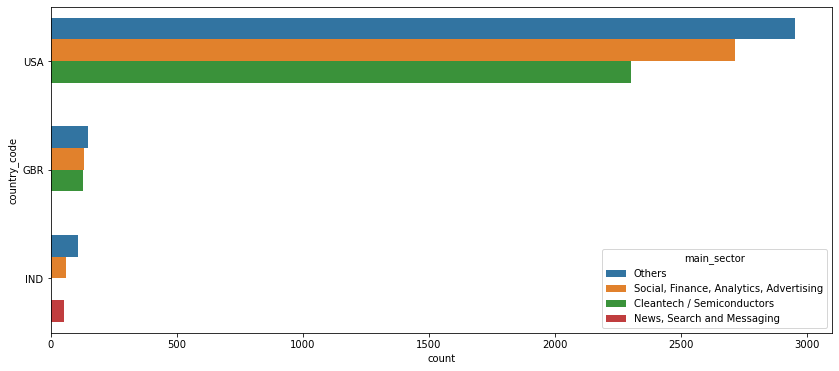

In [74]:
plt.figure(figsize=(14,6))
df_USA = pd.DataFrame(D1.main_sector.value_counts()[:3])
df_USA['country_code'] = 'USA'

df_GBR = pd.DataFrame(D2.main_sector.value_counts()[:3])
df_GBR['country_code']='GBR'

df_IND = pd.DataFrame(D3.main_sector.value_counts()[:3])
df_IND['country_code']='IND'
top3_countries=[df_USA,df_GBR,df_IND]
result=pd.concat(top3_countries)

result = result.reset_index().rename({'index':'main_sector','main_sector':'count'},axis=1)
sns.barplot(x='count',y='country_code',hue='main_sector',data=result,estimator=np.sum)
plt.show()